# Explore here

In [203]:
# Your code here

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import joblib




df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv",sep=",")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [165]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [166]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [169]:
df.duplicated().sum()

np.int64(0)

In [170]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

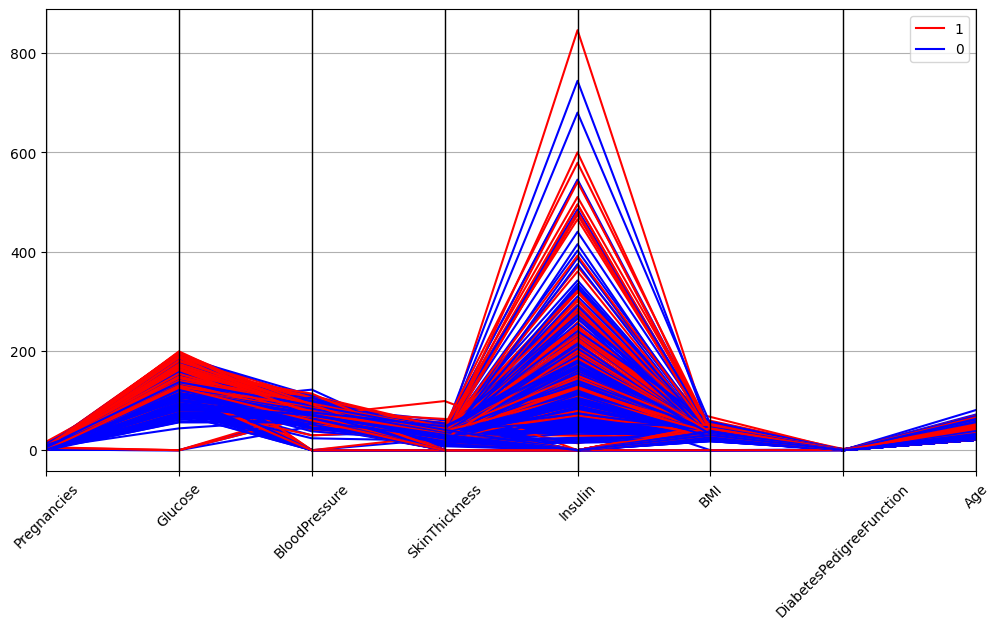

In [171]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

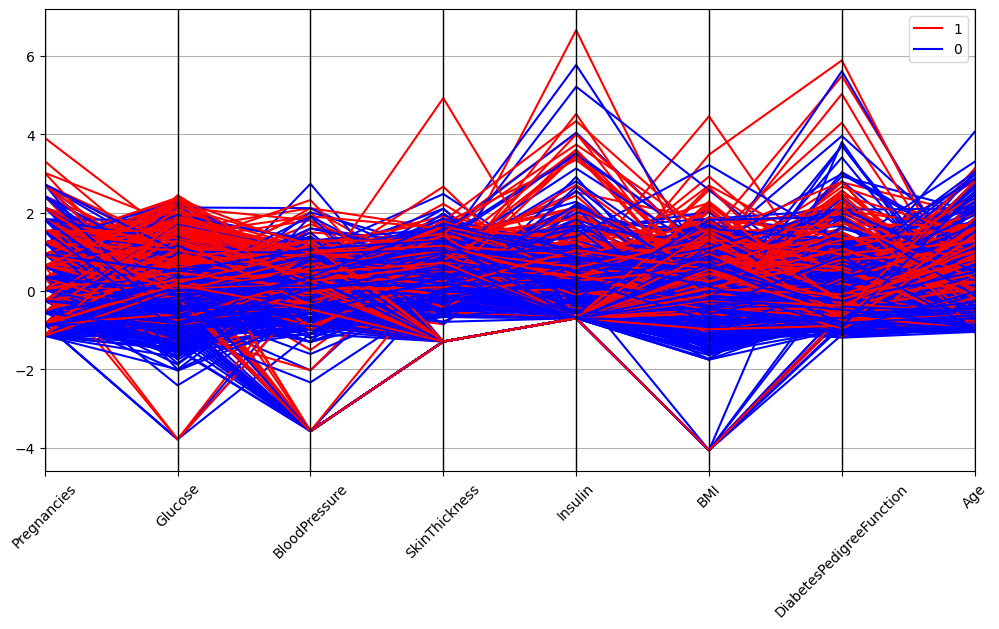

In [172]:
df_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
df_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

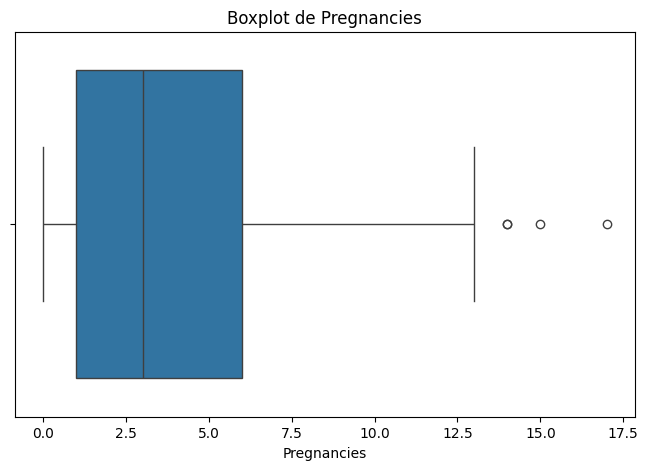

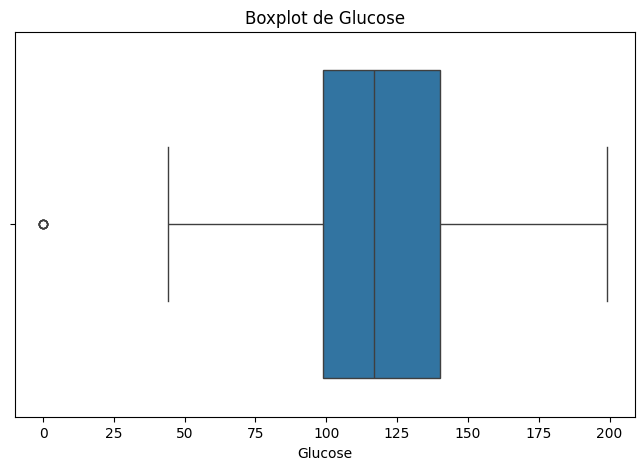

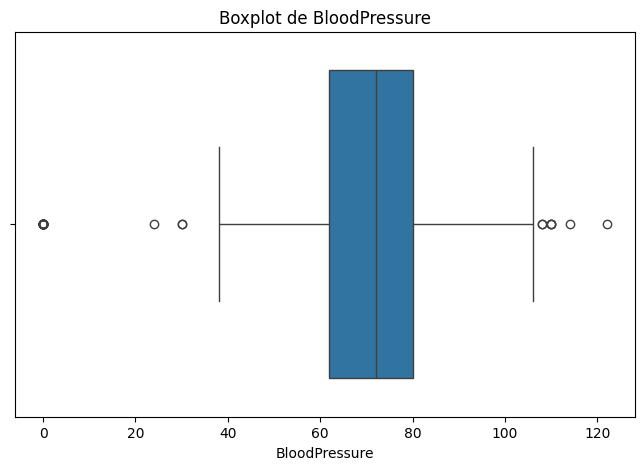

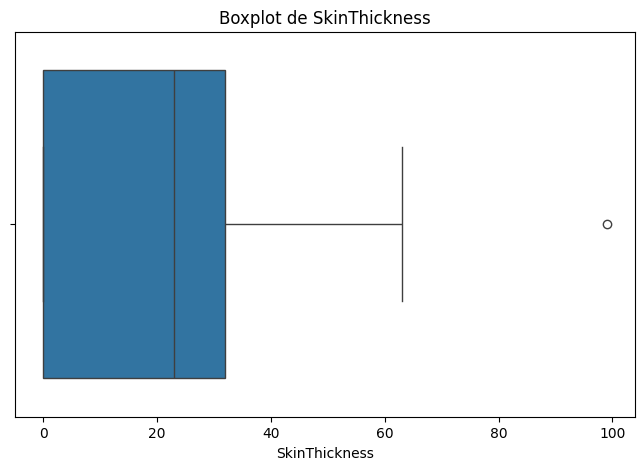

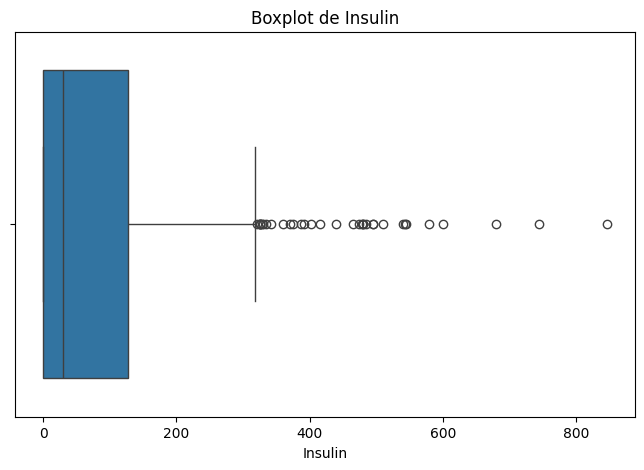

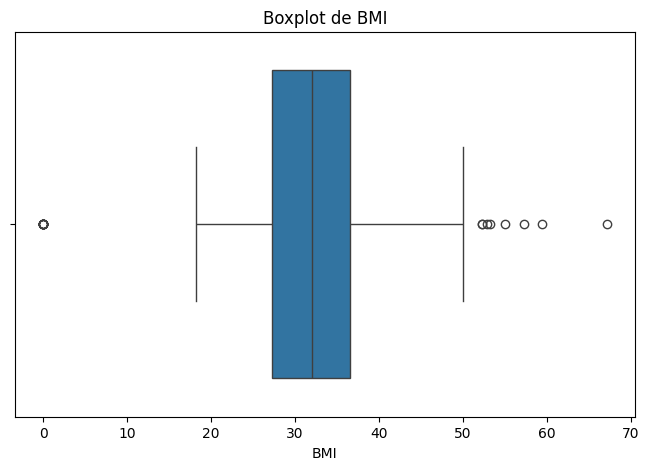

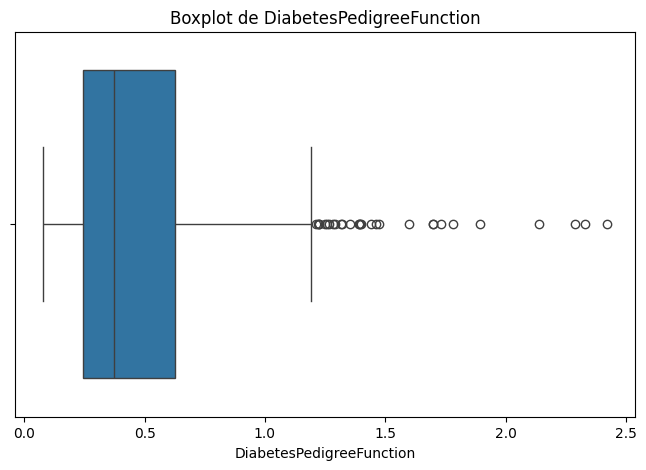

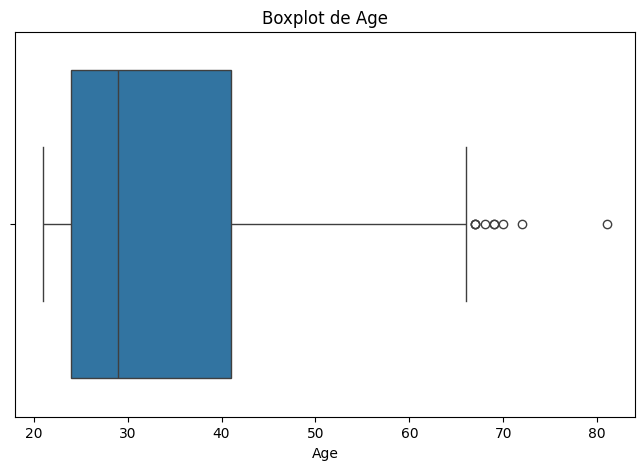

In [173]:
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

In [174]:
X=df.drop(['Outcome'], axis=1)  
y=df.Outcome

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [175]:
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

In [176]:
y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)

In [177]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [178]:
get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [179]:
get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


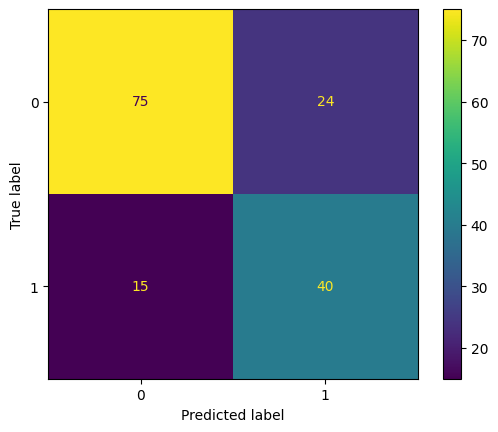

In [180]:
confusion=confusion_matrix(y_test,y_pred_test_complex)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['0', '1'])
disp.plot()

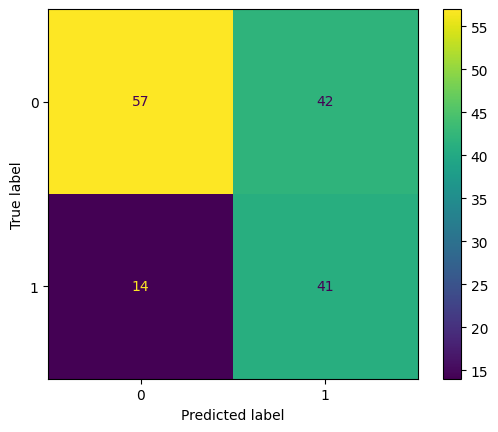

In [181]:
confusion=confusion_matrix(y_test,y_pred_test_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['0', '1'])
disp.plot()

[Text(0.5, 0.875, 'Age <= 28.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = 0'),
 Text(0.25, 0.625, 'Glucose <= 127.5\ngini = 0.304\nsamples = 300\nvalue = [244, 56]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]\nclass = 0'),
 Text(0.375, 0.375, 'SkinThickness <= 31.5\ngini = 0.5\nsamples = 79\nvalue = [40, 39]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.471\nsamples = 50\nvalue = [31, 19]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.428\nsamples = 29\nvalue = [9, 20]\nclass = 1'),
 Text(0.75, 0.625, 'BMI <= 27.85\ngini = 0.5\nsamples = 314\nvalue = [157, 157]\nclass = 0'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 123.0\ngini = 0.358\nsamples = 77\nvalue = [59, 18]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.17

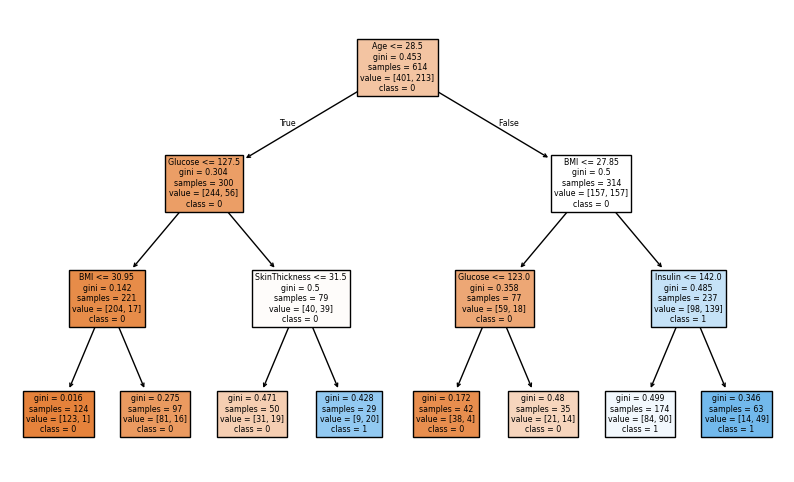

In [182]:
plt.figure(figsize=(10,6))
plot_tree(simple_tree,feature_names=list(X_train.columns),class_names=['0','1'],filled=True)

[Text(0.4602238581730769, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = 0'),
 Text(0.1650390625, 0.8928571428571429, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = 0'),
 Text(0.31263146033653844, 0.9285714285714286, 'True  '),
 Text(0.06009615384615385, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = 0'),
 Text(0.019230769230769232, 0.75, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = 0'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = 0'),
 Text(0.028846153846153848, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = 0'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\ncla

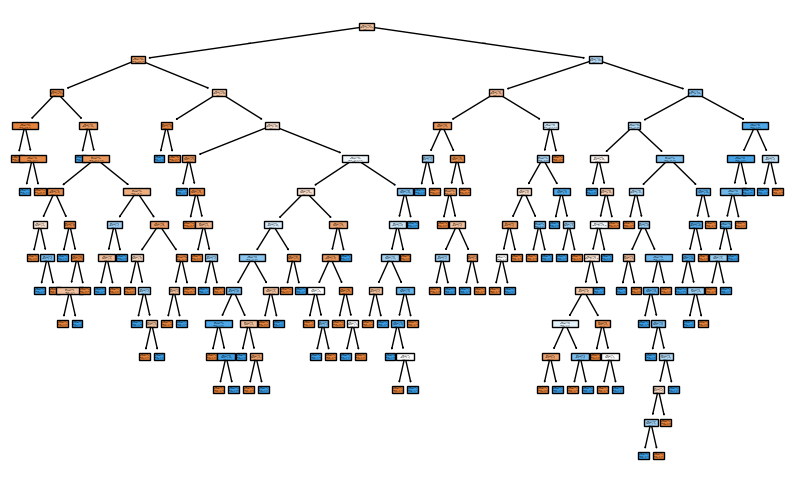

In [183]:
plt.figure(figsize=(10,6))
plot_tree(complex_tree,feature_names=list(X_train.columns),class_names=['0','1'],filled=True)

In [184]:

hp_params={
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(10, 100, 10),             
    'min_samples_split': np.arange(2, 20, 2),      
    'min_samples_leaf': np.arange(1, 10, 1),     
    'max_features': ['sqrt', 'log2', None], 
    'criterion': ['gini', 'entropy']
}

estimator=ExtraTreesClassifier()
random_search=RandomizedSearchCV(estimator,param_distributions=hp_params,n_iter=5,cv=5,random_state=42,n_jobs=1,scoring='accuracy')
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, scoring='accuracy')

In [185]:
random_search.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=np.int64(90),
                     max_features='log2', min_samples_leaf=np.int64(4),
                     min_samples_split=np.int64(2), n_estimators=np.int64(80))

In [186]:
random_search.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(4),
 'max_features': 'log2',
 'max_depth': np.int64(90),
 'criterion': 'entropy'}

In [187]:
random_search.best_score_*-1

np.float64(-0.7736238837798215)

In [188]:
random_search.cv_results_

{'mean_fit_time': array([0.0098371 , 0.04968481, 0.07066579, 0.06849356, 0.01812797]),
 'std_fit_time': array([0.00241968, 0.0056226 , 0.0128083 , 0.0115935 , 0.0005585 ]),
 'mean_score_time': array([0.00214553, 0.0038722 , 0.00552654, 0.00531726, 0.0023345 ]),
 'std_score_time': array([0.00036282, 0.00016283, 0.00099977, 0.00119788, 0.00023966]),
 'param_n_estimators': masked_array(data=[10, 60, 80, 80, 20],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[2, 12, 2, 6, 8],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_min_samples_leaf': masked_array(data=[7, 2, 4, 5, 6],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_max_features': masked_array(data=['sqrt', 'log2', 'log2', 'sqrt', None],
              mask=[False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_max

In [189]:

hp_params = {
    'n_estimators': [20, 60, 80],  
    'min_samples_split': [2, 4,6, 12], 
    'min_samples_leaf': [2, 4, 5, 7], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10,30, 60, 90], 
    'criterion': ['gini', 'entropy']
}

grid_search=GridSearchCV(estimator,param_grid=hp_params,cv=5,n_jobs=1,scoring='accuracy',verbose=3)

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.797 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.715 total time=   0.1s


[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.748 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.754 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.699 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.813 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.748 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.764 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_sa

/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 60, 90],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4, 5, 7],
                         'min_samples_split': [2, 4, 6, 12],
                         'n_estimators': [20, 60, 80]},
             scoring='accuracy', verbose=3)

In [190]:
grid_search.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=10, max_features='log2',
                     min_samples_leaf=2, n_estimators=80)

In [191]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [192]:
y_pred_train_grid=(grid_search.best_estimator_.predict(X_train))
y_pred_test_grid=(grid_search.best_estimator_.predict(X_test))


In [193]:
get_metrics(y_train,y_test,y_pred_train_grid,y_pred_test_grid)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.934853,0.897959,0.909405,0.983240,0.826291,0.992519
Test,0.759740,0.654206,0.732323,0.673077,0.636364,0.828283
Diferencia,0.175113,0.243754,0.177082,0.310163,0.189927,0.164236


In [194]:

model_bagging = BaggingClassifier(grid_search.best_estimator_, n_estimators=15, random_state=42).fit(X_train, y_train)

In [195]:
y_pred_train_bag=model_bagging.predict(X_train)
y_pred_test_bag=model_bagging.predict(X_test)

In [196]:
get_metrics(y_train,y_test,y_pred_train_bag,y_pred_test_bag)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.899023,0.836842,0.863264,0.952096,0.746479,0.980050
Test,0.792208,0.686275,0.757576,0.744681,0.636364,0.878788
Diferencia,0.106815,0.150568,0.105689,0.207415,0.110115,0.101262


In [197]:
X_final=pd.concat([X_train,X_test],ignore_index=True)
y_final=pd.concat([y_train,y_test],ignore_index=True)

In [198]:
final_model=BaggingClassifier(grid_search.best_estimator_,n_estimators=15,random_state=42).fit(X_final,y_final)

In [201]:
final_model.get_params

<bound method BaseEstimator.get_params of BaggingClassifier(estimator=ExtraTreesClassifier(criterion='entropy',
                                                 max_depth=10,
                                                 max_features='log2',
                                                 min_samples_leaf=2,
                                                 n_estimators=80),
                  n_estimators=15, random_state=42)>

In [204]:
joblib.dump(final_model,'decision_tree_entropy_max_depth=10_max_featureslog2_min_samples_leaf=2_estimators=80).pk1')

['decision_tree_entropy_max_depth=10_max_featureslog2_min_samples_leaf=2_estimators=80).pk1']